### Import and dataset loading

In [1]:
from scipy.io import arff
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
arff_file = arff.loadarff('speeddating.arff')
df = pd.DataFrame(arff_file[0])

df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Remove redundant columns 

In [3]:
# COLUMN d_age AND d_d_age CAN BE REMOVED BECAUSE IS THE RESULT OF TWO OTHER COLUMNS
df = df.drop(columns=['d_age', 'd_d_age'])

# samerace CAN BE REMOVED BEACUSE IS THE RESULT OF race AND race_o
df = df.drop(columns=['samerace'])

# WE MUST CHOOSE BETWEEN importance_same_race AND d_importance_same_race (same data but different presentation)
df = df.drop(columns=['d_importance_same_race'])

# WE MUST CHOOSE BETWEEN importance_same_religion AND d_importance_same_religion (same data but different presentation)
df = df.drop(columns=['d_importance_same_religion'])

# MUST BE REMOVED BECAUSE IS REPEATED 

df = df.drop(columns=[
    'd_pref_o_attractive', 'd_pref_o_sincere', 'd_pref_o_intelligence','d_pref_o_funny', 'd_pref_o_ambitious', 'd_pref_o_shared_interests',
    'd_attractive_o', 'd_sinsere_o', 'd_intelligence_o', 'd_funny_o', 'd_ambitous_o', 'd_shared_interests_o',
    'd_attractive_important', 'd_sincere_important', 'd_intellicence_important', 'd_funny_important', 'd_ambtition_important', 'd_shared_interests_important',
    'd_attractive', 'd_sincere', 'd_intelligence', 'd_funny', 'd_ambition',
    'd_attractive_partner', 'd_sincere_partner', 'd_intelligence_partner', 'd_funny_partner', 'd_ambition_partner', 'd_shared_interests_partner',
    'd_sports', 'd_tvsports', 'd_exercise','d_dining', 'd_museums', 'd_art', 'd_hiking', 'd_gaming', 'd_clubbing', 'd_reading', 'd_tv', 'd_theater', 'd_movies', 'd_concerts', 'd_music', 'd_shopping', 'd_yoga',
    'd_interests_correlate',
    'd_expected_happy_with_sd_people', 'd_expected_num_interested_in_me', 'd_expected_num_matches',
    'd_like', 'd_guess_prob_liked'])

# THE COLUMN MATCH MUST BE REMOVED BECAUSE IS THE RESULT OF OThER TWO
# df = df.drop(columns=['match']) ## We need this for the prediction, is our target column

df = df.drop(columns=['has_null'])

df.to_csv('preprocessed.csv', index=False)

# Dataset analysis

In [4]:
types = df.dtypes

num_categoricals = (types == 'object').sum()
num_numericals = ((types == 'int64') | (types == 'float64')).sum()

print ("Number of categorical variables: ", num_categoricals)
print ("Number of numerical variables: ", num_numericals)

Number of categorical variables:  7
Number of numerical variables:  58


In [5]:
df.describe()

,wave,age,age_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked,met
count,8378.000000,8283.000000,8274.000000,8299.000000,8299.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8220.000000,8277.000000,1800.000000,7205.000000,8138.000000,8069.000000,8003.000000
mean,11.350919,26.358928,26.364999,3.784793,3.651645,22.495347,17.396867,20.270759,17.459714,10.685375,11.845930,6.190411,7.175256,7.369301,6.400599,6.778409,5.474870,22.514632,17.396389,20.265613,17.457043,10.682539,11.845111,7.084733,8.294935,7.704460,8.403965,7.578388,6.189995,7.175164,7.368597,6.400598,6.777524,5.474559,6.425232,4.575491,6.245813,7.783829,6.985781,6.714544,5.737077,3.881191,5.745993,7.678515,5.304133,6.776118,7.919629,6.825401,7.851066,5.631281,4.339197,0.196010,5.534131,5.570556,3.207814,6.134087,5.207523,0.049856
std,5.995903,3.566763,3.563648,2.845708,2.805237,12.569802,7.044003,6.782895,6.085526,6.126544,6.362746,1.950305,1.740575,1.550501,1.954078,1.794080,2.156163,12.587674,7.046700,6.783003,6.085239,6.124888,6.362154,1.395783,1.407460,1.564321,1.076608,1.778315,1.950169,1.740315,1.550453,1.953702,1.794055,2.156363,2.619024,2.801874,2.418858,1.754868,2.052232,2.263407,2.570207,2.620507,2.502218,2.006565,2.529135,2.235152,1.700927,2.156283,1.791827,2.608913,2.717612,0.303539,1.734059,4.762569,2.444813,1.841285,2.129565,0.282168
min,1.000000,18.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-0.830000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,24.000000,24.000000,1.000000,1.000000,15.000000,15.000000,17.390000,15.000000,5.000000,9.520000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,15.000000,15.000000,17.390000,15.000000,5.000000,9.520000,6.000000,8.000000,7.000000,8.000000,7.000000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,4.000000,2.000000,5.000000,7.000000,6.000000,5.000000,4.000000,2.000000,4.000000,7.000000,3.000000,5.000000,7.000000,5.000000,7.000000,4.000000,2.000000,-0.020000,5.000000,2.000000,2.000000,5.000000,4.000000,0.000000
50%,11.000000,26.000000,26.000000,3.000000,3.000000,20.000000,18.370000,20.000000,18.000000,10.000000,10.640000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,20.000000,18.180000,20.000000,18.000000,10.000000,10.640000,7.000000,8.000000,8.000000,8.000000,8.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,4.000000,6.000000,8.000000,7.000000,7.000000,6.000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 65 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   wave                           8378 non-null   float64
 1   gender                         8378 non-null   object 
 2   age                            8283 non-null   float64
 3   age_o                          8274 non-null   float64
 4   race                           8378 non-null   object 
 5   race_o                         8378 non-null   object 
 6   importance_same_race           8299 non-null   float64
 7   importance_same_religion       8299 non-null   float64
 8   field                          8378 non-null   object 
 9   pref_o_attractive              8289 non-null   float64
 10  pref_o_sincere                 8289 non-null   float64
 11  pref_o_intelligence            8289 non-null   float64
 12  pref_o_funny                   8280 non-null   f

## Missing values analysis and correction

In [7]:
missing_values_count = df.isnull().sum()
missing_values_percent = (df.isnull().sum() / len(df)) * 100

missing_data = pd.DataFrame({'Count': missing_values_count, 'Percent': missing_values_percent})
missing_data = missing_data.sort_values(by='Percent', ascending=False)

print(missing_data)

                               Count    Percent
expected_num_interested_in_me   6578  78.515159
expected_num_matches            1173  14.000955
shared_interests_o              1076  12.843161
shared_interests_partner        1067  12.735736
ambitous_o                       722   8.617809
ambition_partner                 712   8.498448
met                              375   4.476009
funny_o                          360   4.296968
funny_partner                    350   4.177608
guess_prob_liked                 309   3.688231
intelligence_o                   306   3.652423
intelligence_partner             296   3.533063
sinsere_o                        287   3.425639
sincere_partner                  277   3.306278
like                             240   2.864646
attractive_o                     212   2.530437
attractive_partner               202   2.411077
interests_correlate              158   1.885892
pref_o_shared_interests          129   1.539747
shared_interests_important       121   1

In [8]:
# Drop expected_num_interested_in_me since it has 80% missing values
df = df.drop(columns=['expected_num_interested_in_me'])

In [9]:
# Replace the other missing values with the mean of the data (Should be done an analysis if this changes the distribution of data)
df = df.fillna(df.mean())

C:\Users\Creix\AppData\Local\Temp\ipykernel_23112\2653994695.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [10]:
missing_values_count = df.isnull().sum()
missing_values_percent = (df.isnull().sum() / len(df)) * 100

missing_data = pd.DataFrame({'Count': missing_values_count, 'Percent': missing_values_percent})
missing_data = missing_data.sort_values(by='Percent', ascending=False)

print(missing_data)

                               Count  Percent
wave                               0      0.0
gender                             0      0.0
intelligence_partner               0      0.0
funny_partner                      0      0.0
ambition_partner                   0      0.0
shared_interests_partner           0      0.0
sports                             0      0.0
tvsports                           0      0.0
exercise                           0      0.0
dining                             0      0.0
museums                            0      0.0
art                                0      0.0
hiking                             0      0.0
gaming                             0      0.0
clubbing                           0      0.0
reading                            0      0.0
tv                                 0      0.0
theater                            0      0.0
movies                             0      0.0
concerts                           0      0.0
music                             

## Feature Analysis

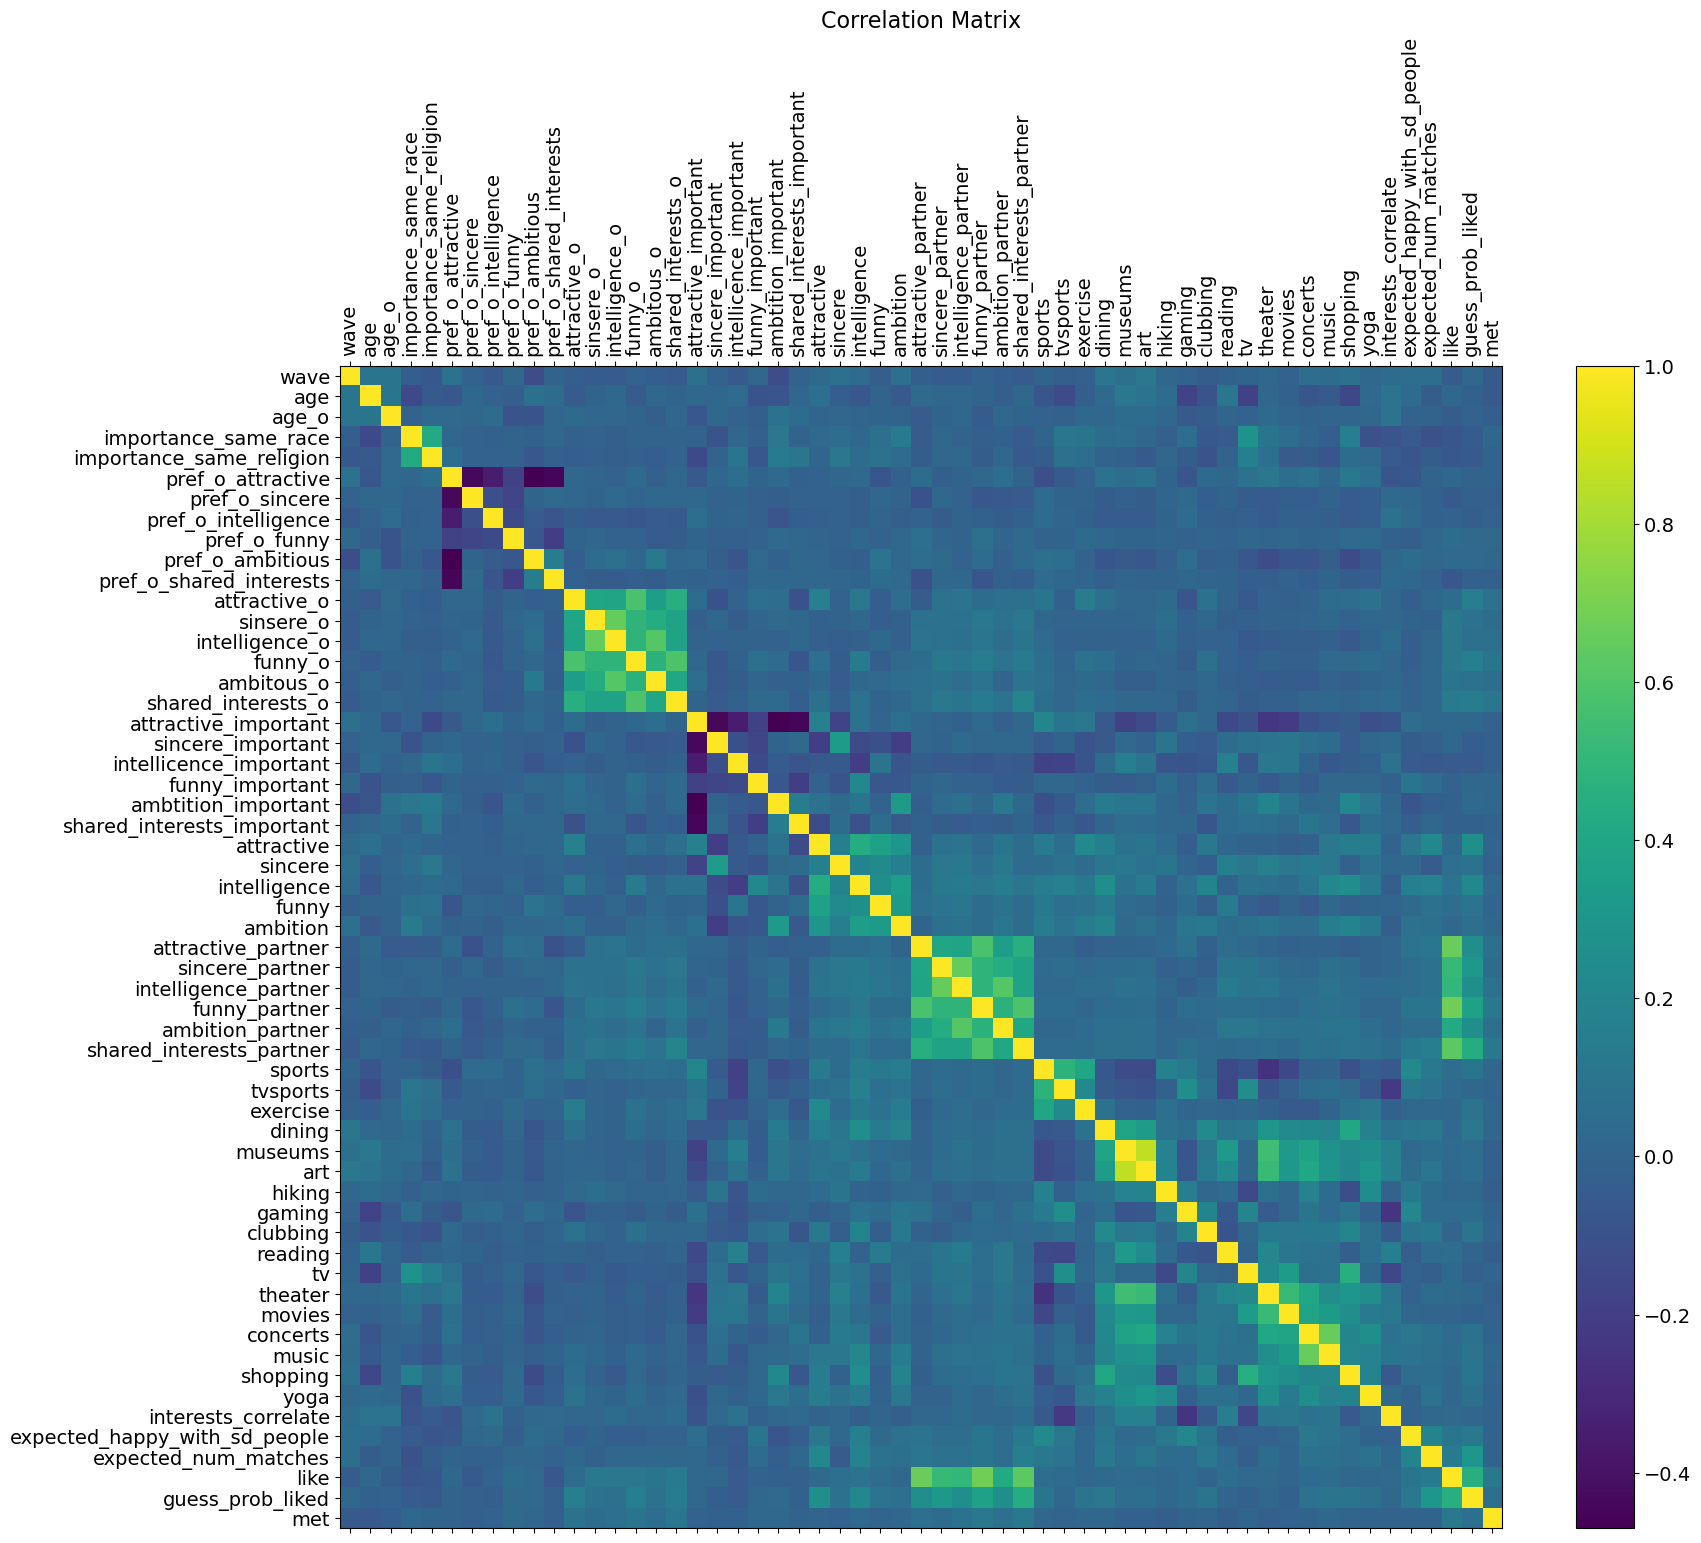

In [11]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

0    6998
1    1380
Name: match, dtype: int64


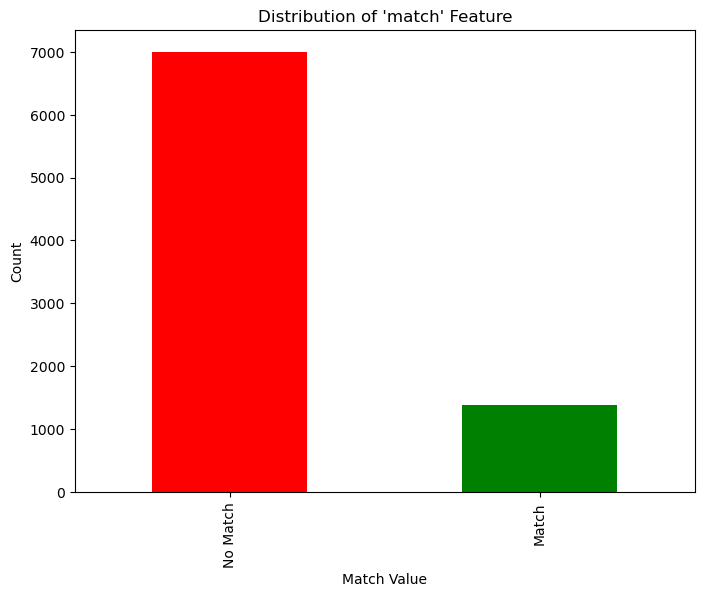

In [12]:
match_counts = df['match'].value_counts()

plt.figure(figsize=(8, 6))
match_counts.plot(kind='bar', color=['red', 'green'])  # Set colors for 0 and 1
plt.xlabel("Match Value")
plt.ylabel("Count")
plt.title("Distribution of 'match' Feature")
plt.xticks([0, 1], ['No Match', 'Match'])  # Set custom x-axis labels

print(match_counts)
plt.show()

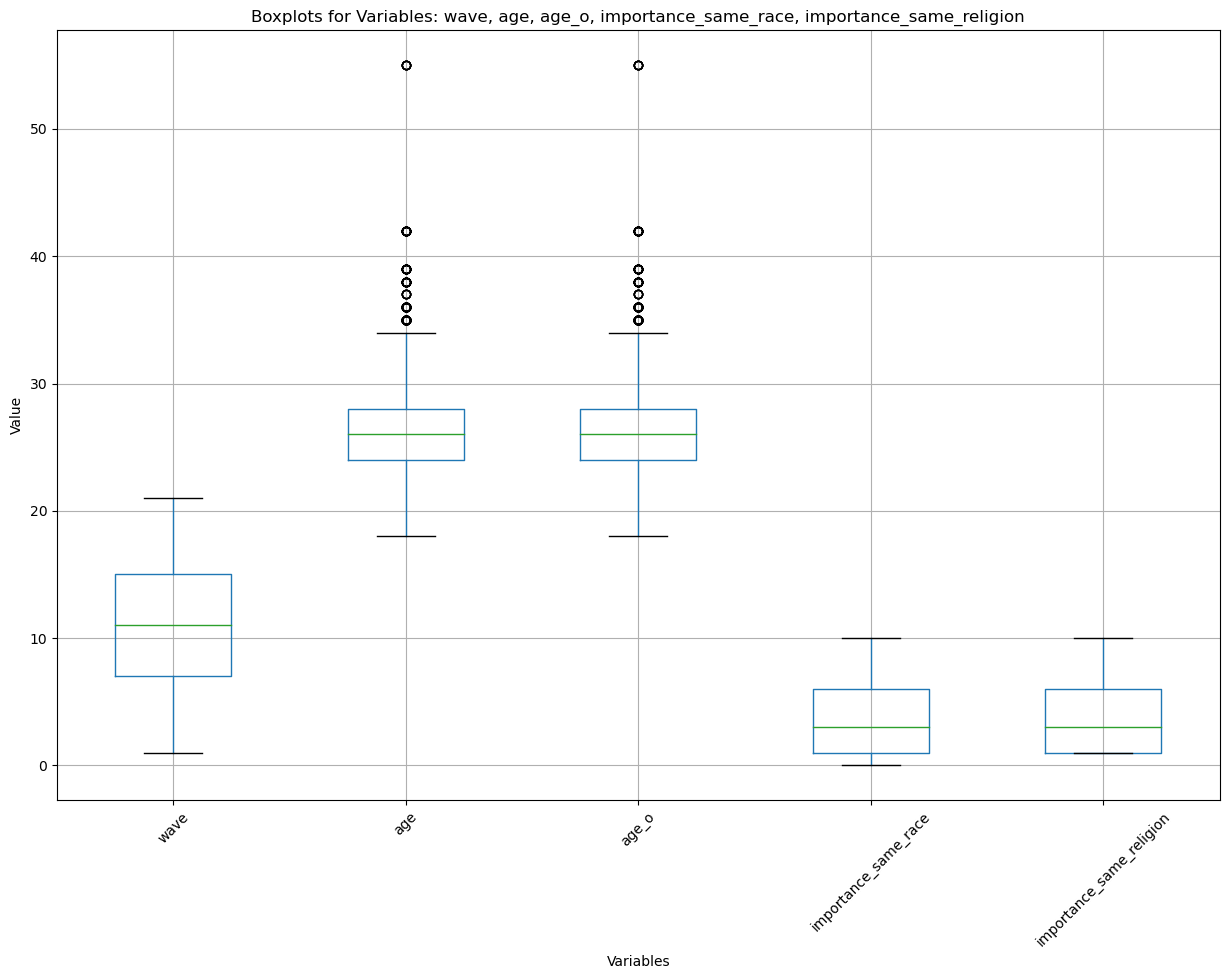

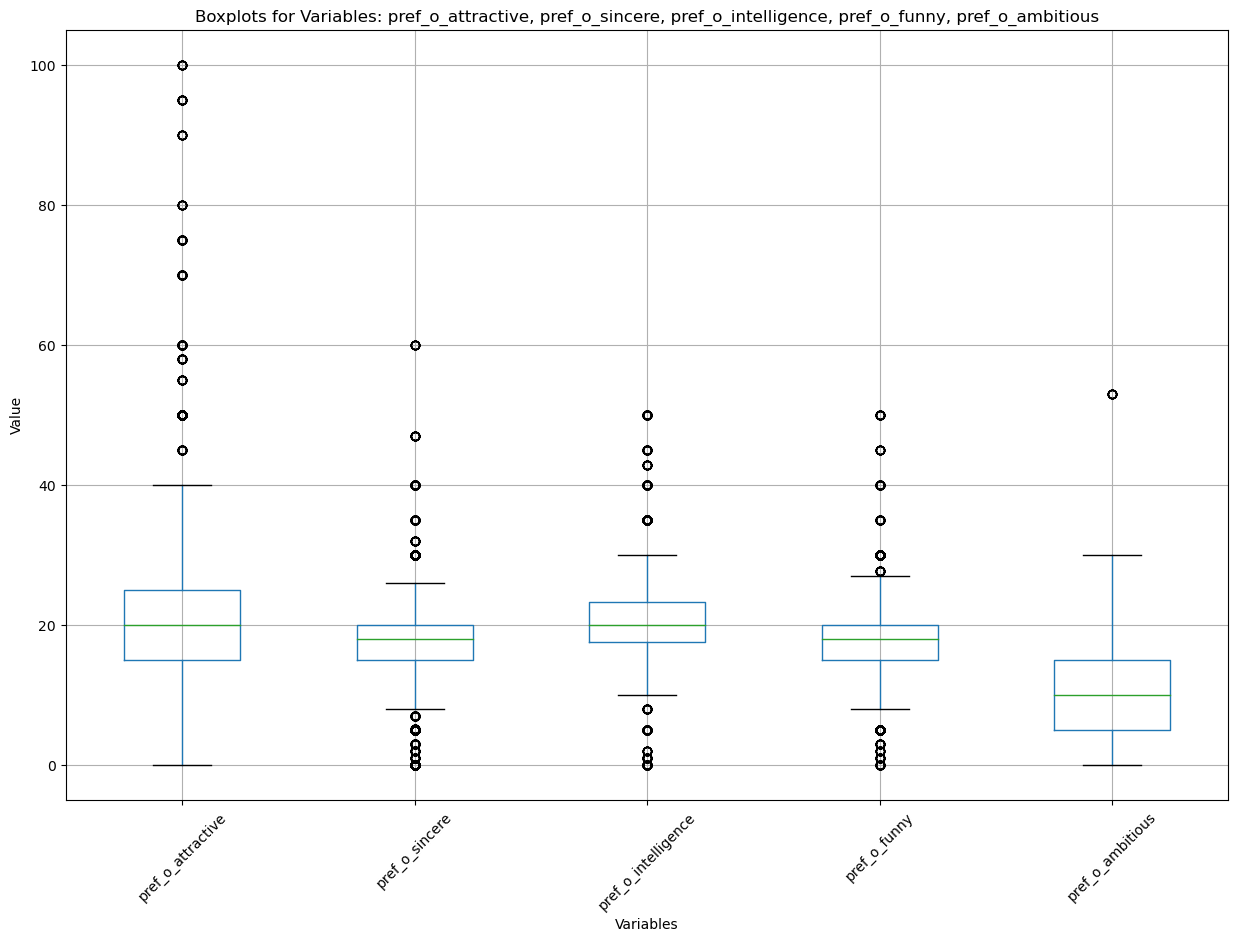

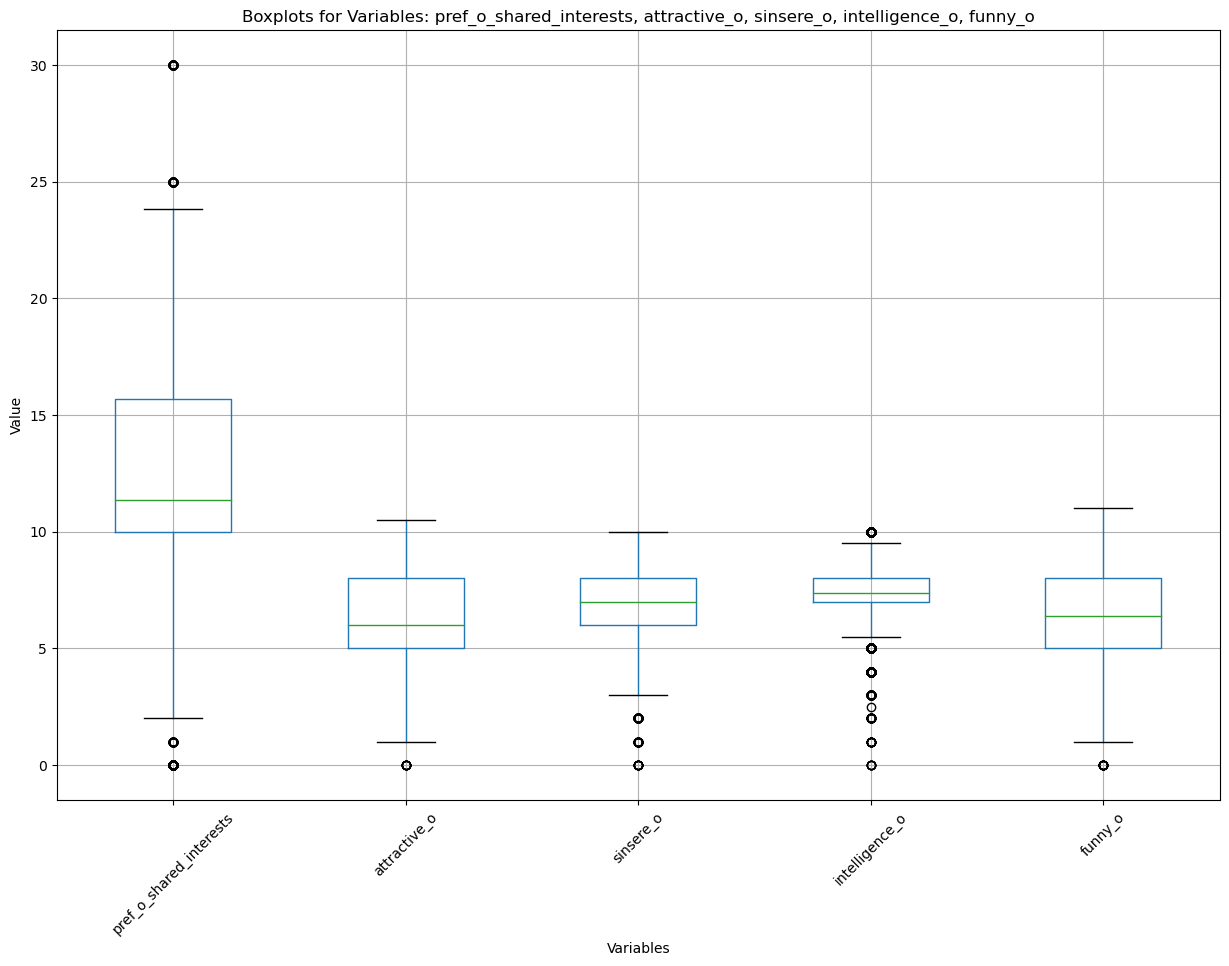

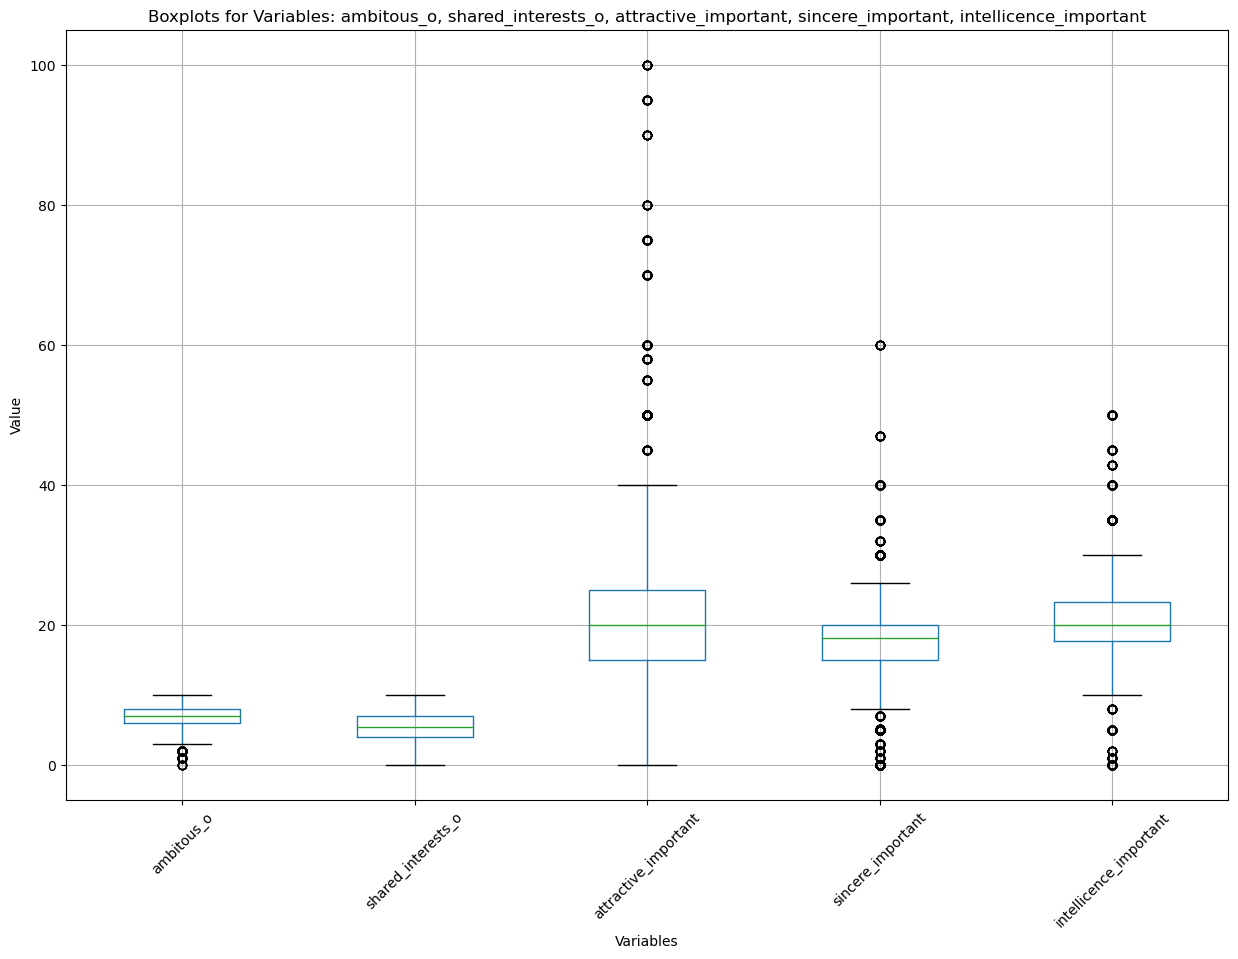

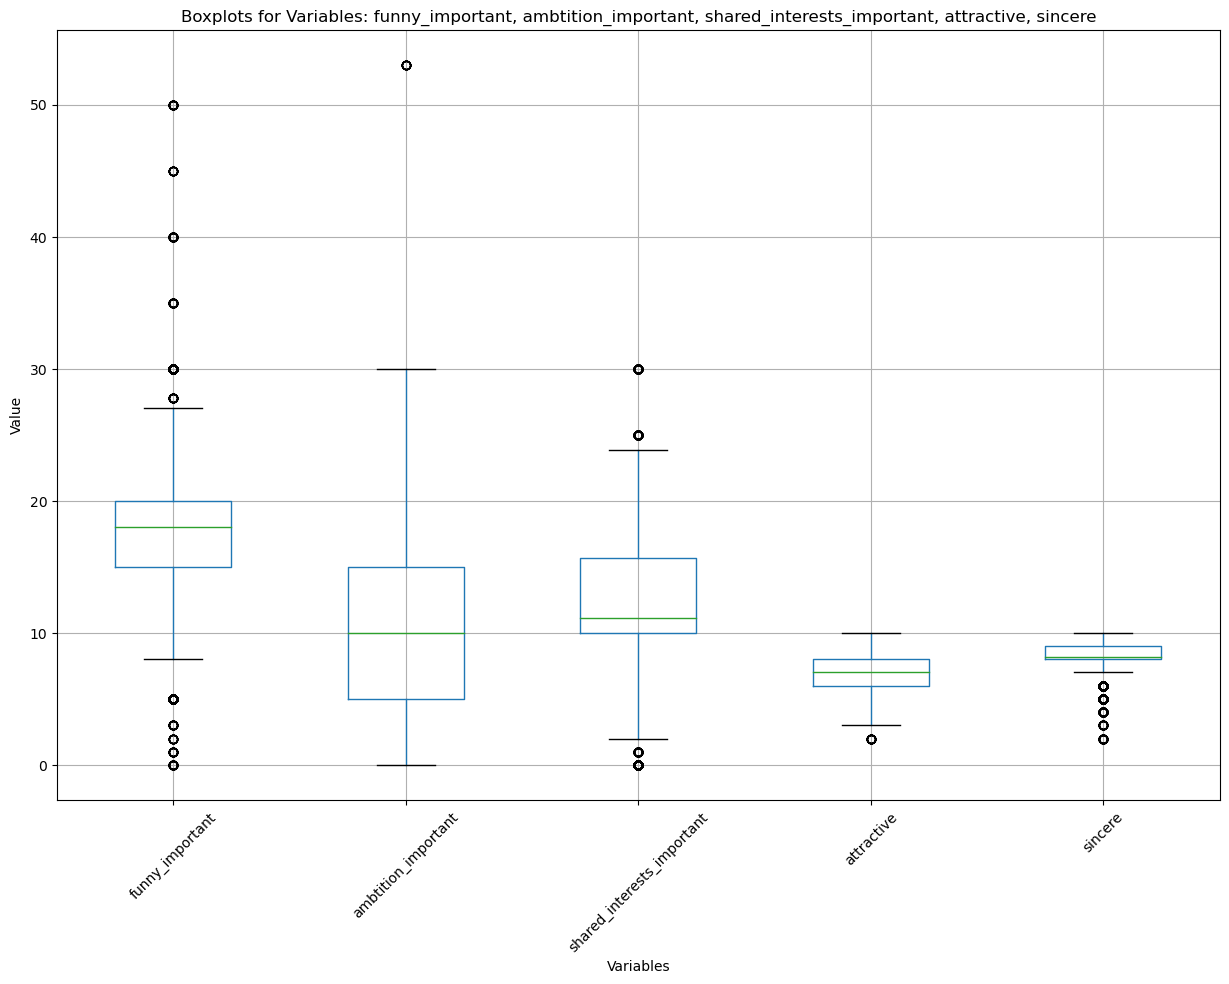

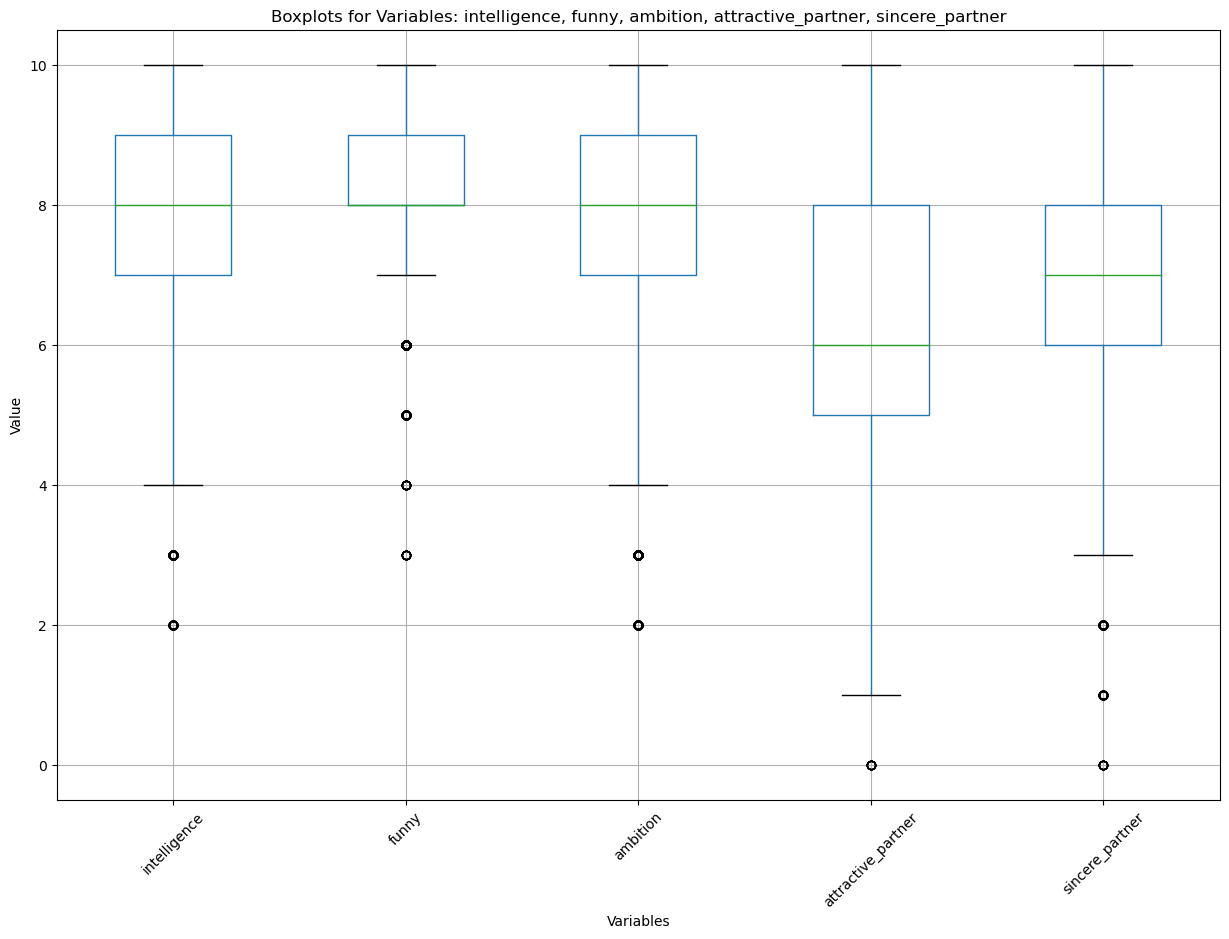

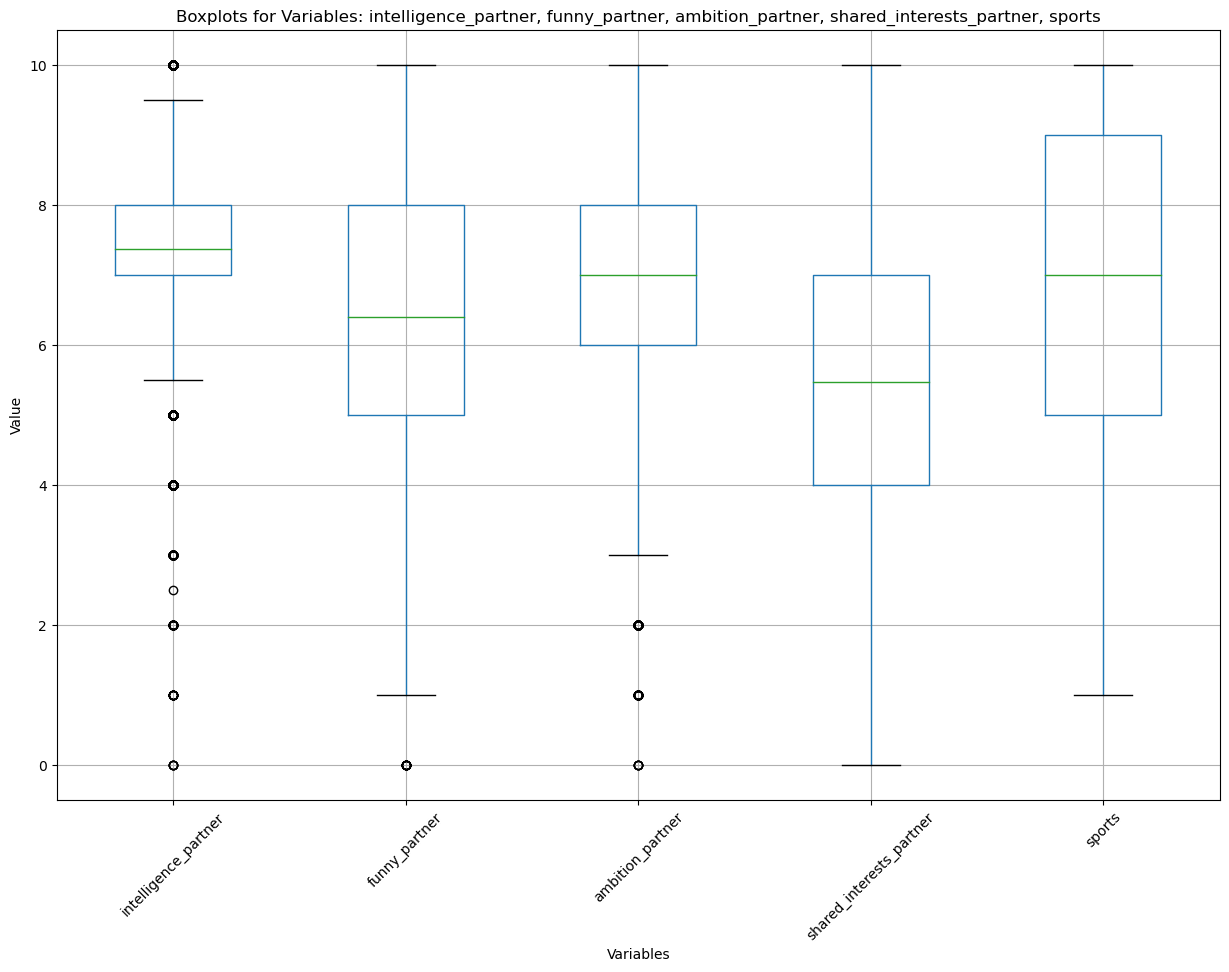

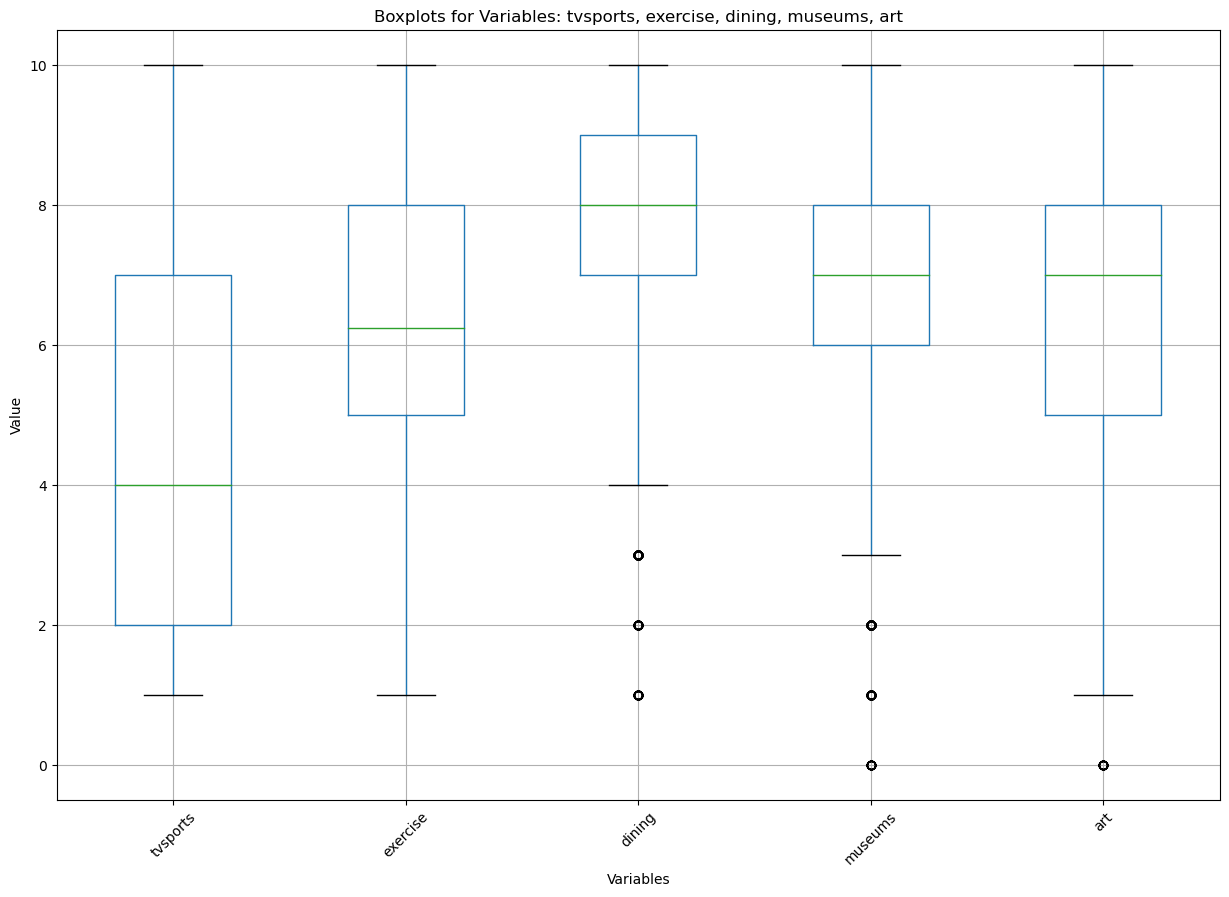

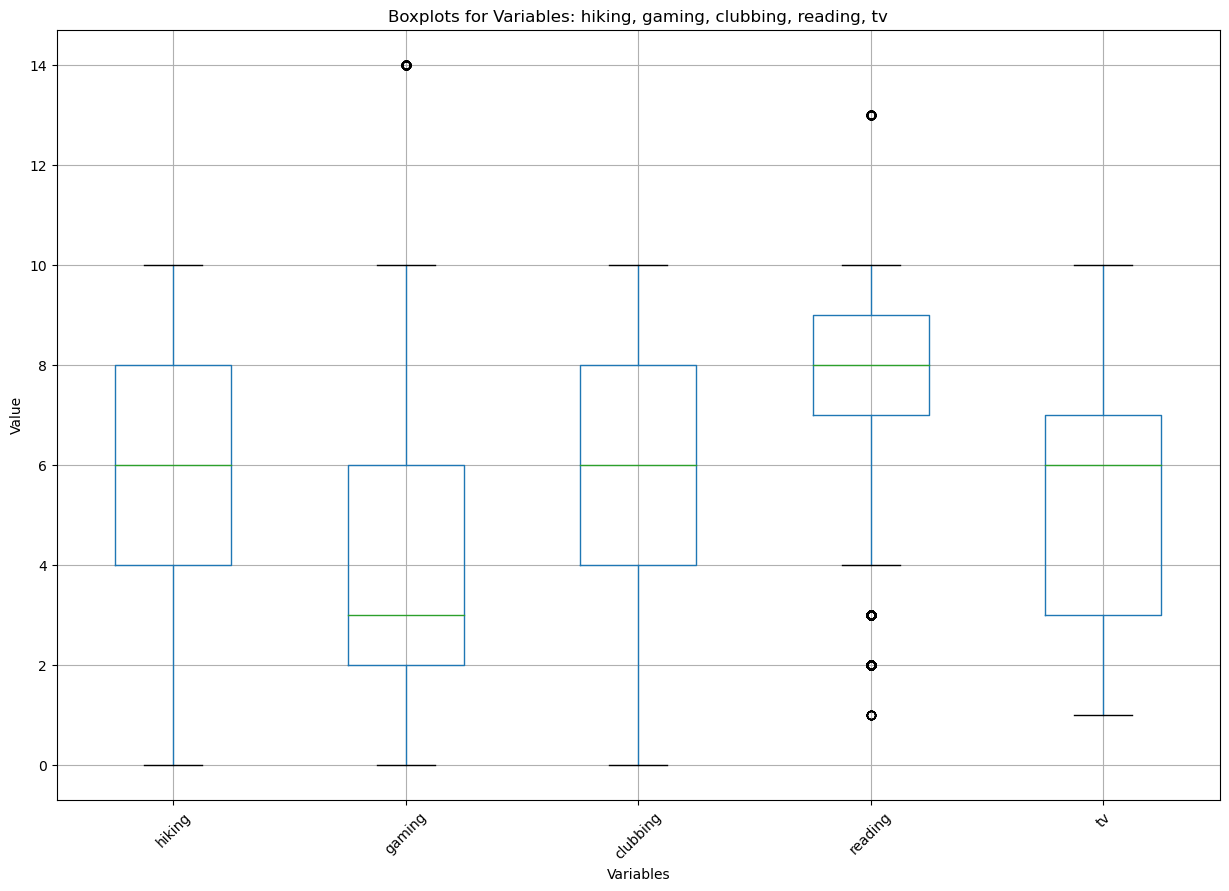

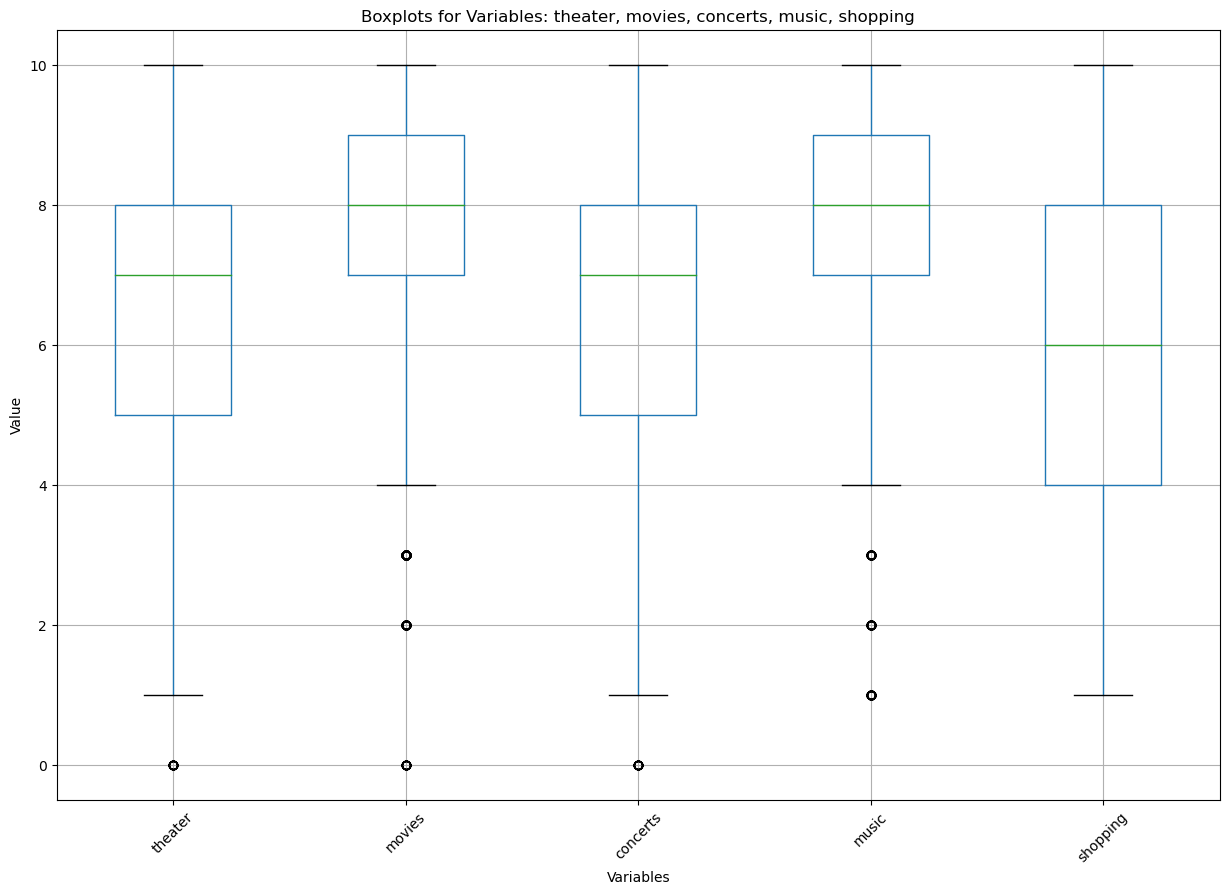

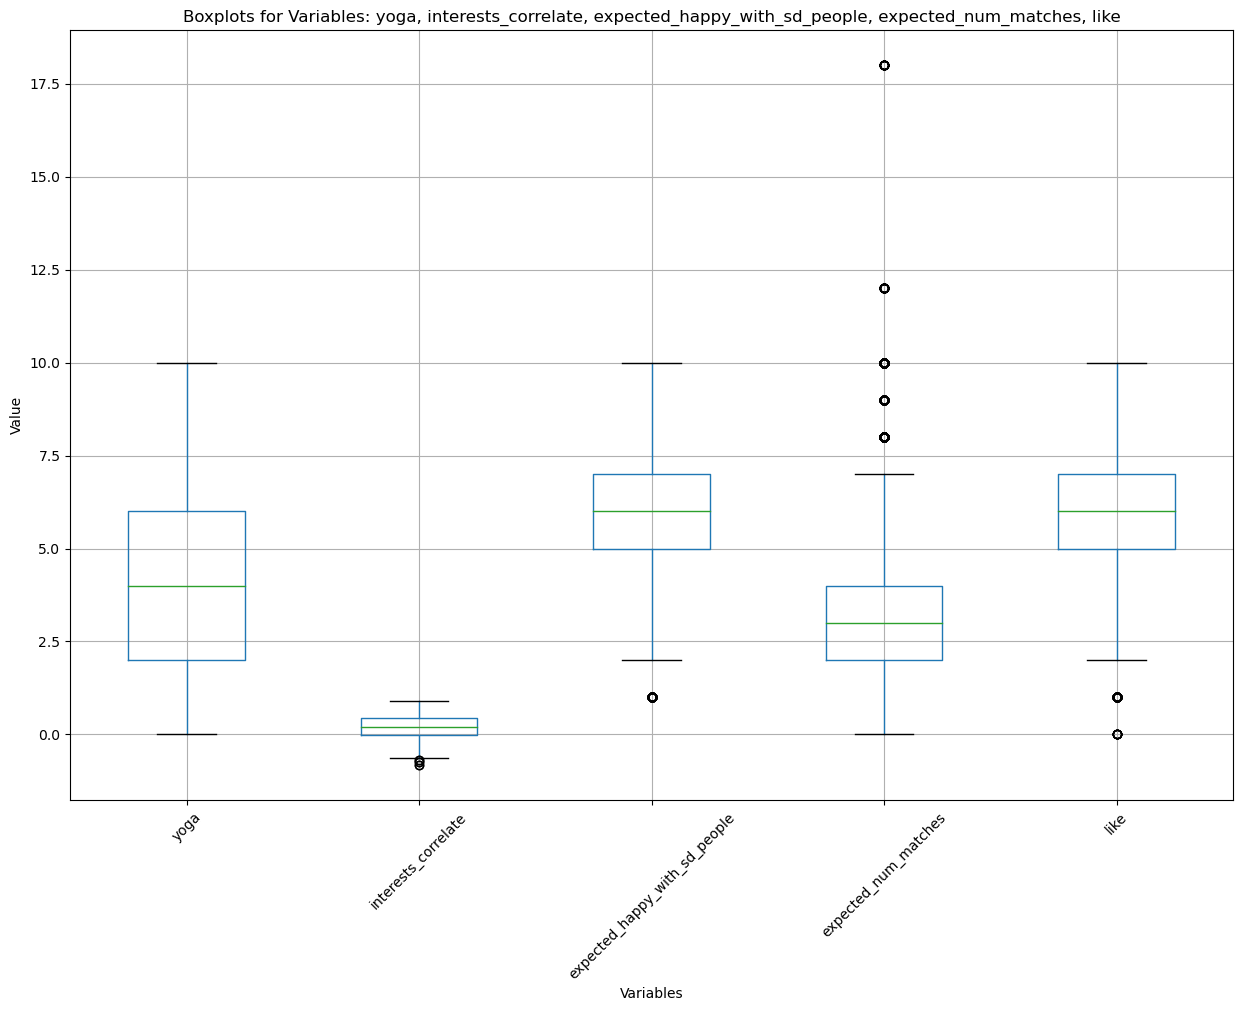

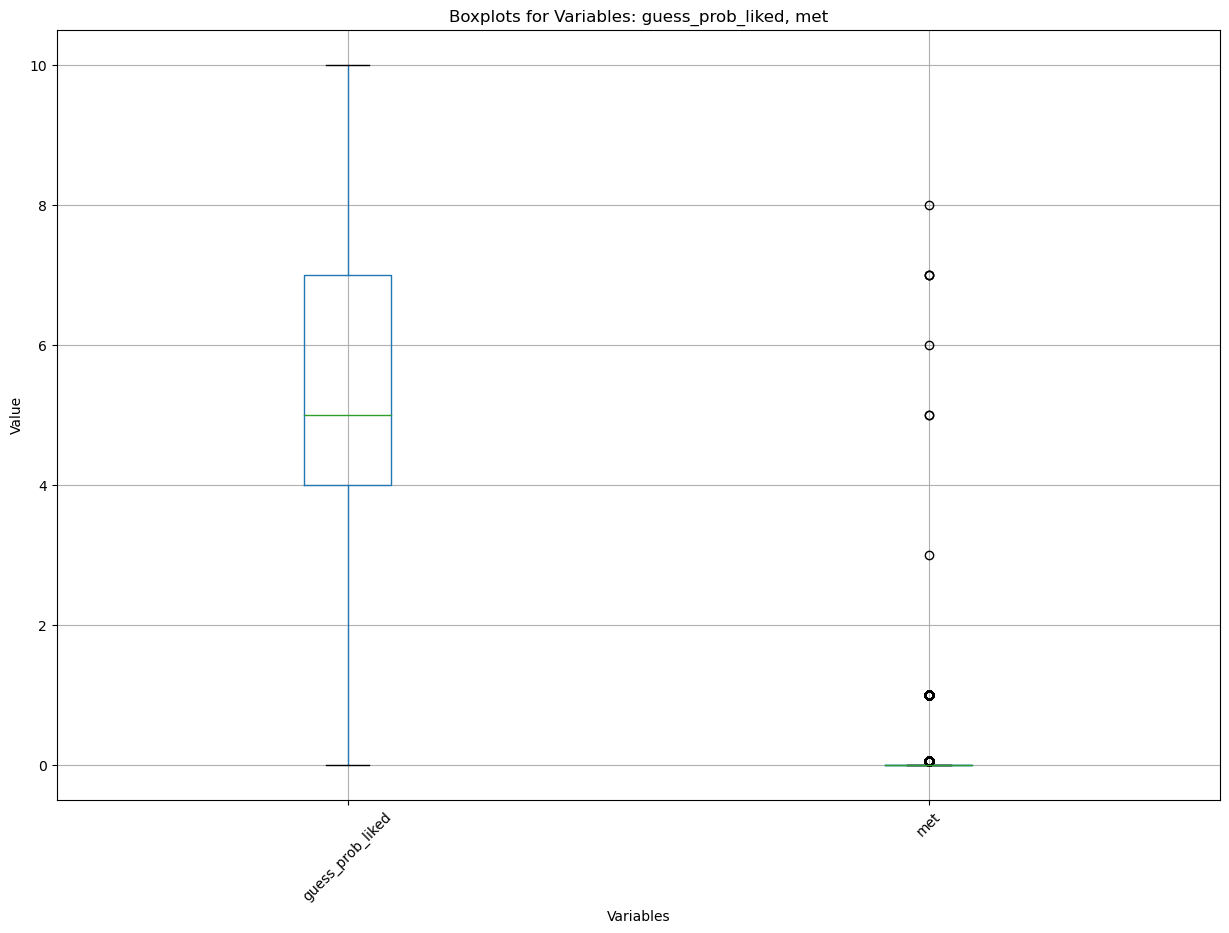

ValueError: boxplot method requires numerical columns, nothing to plot.

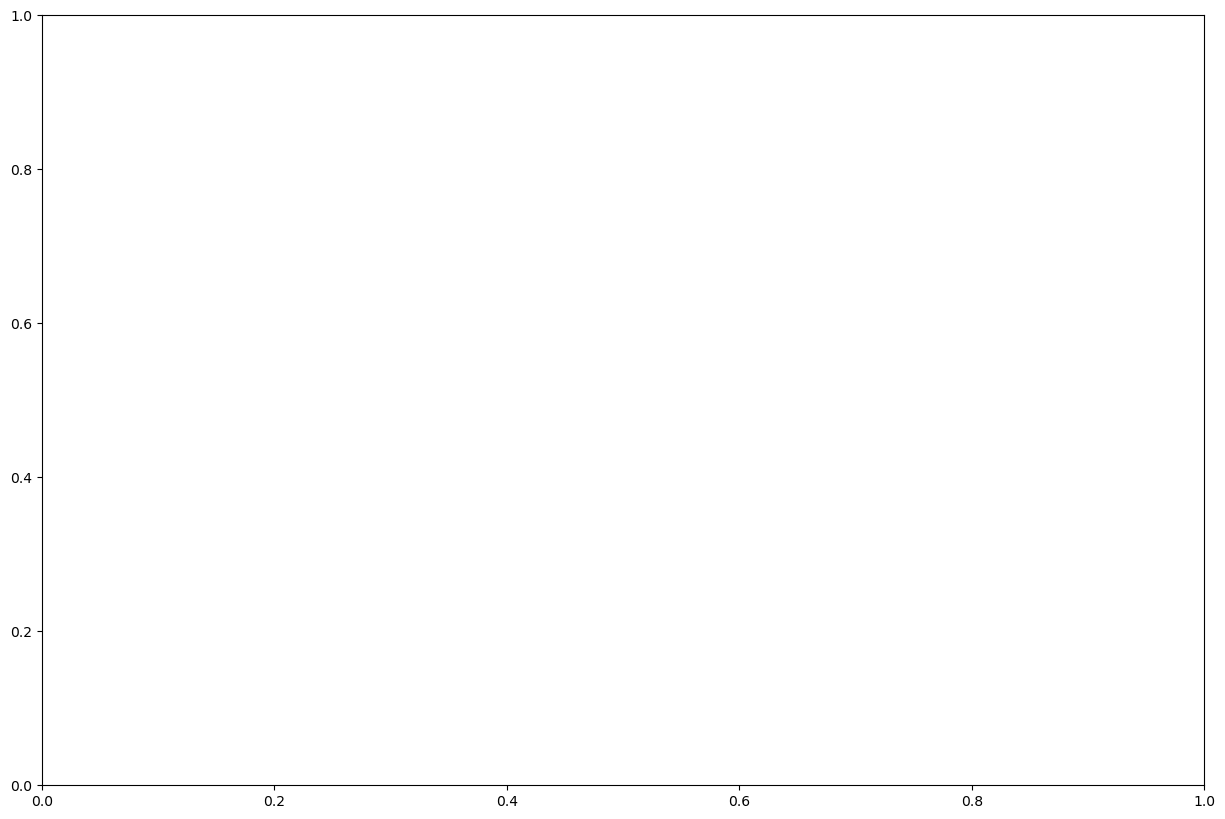

In [13]:
variables = list(df.select_dtypes(include=[np.number]).columns)

for i in range(0, len(df), 5):
    current_var = variables[i:i+5]
    
    plt.figure(figsize=(15, 10))  

    df[current_var].boxplot()
    
    plt.title(f"Boxplots for Variables: {', '.join(current_var)}")
    plt.xlabel("Variables")
    plt.ylabel("Value")
    plt.xticks(rotation=45)
    plt.show()

array([[<AxesSubplot:title={'center':'wave'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'age_o'}>,
        <AxesSubplot:title={'center':'importance_same_race'}>,
        <AxesSubplot:title={'center':'importance_same_religion'}>,
        <AxesSubplot:title={'center':'pref_o_attractive'}>,
        <AxesSubplot:title={'center':'pref_o_sincere'}>,
        <AxesSubplot:title={'center':'pref_o_intelligence'}>],
       [<AxesSubplot:title={'center':'pref_o_funny'}>,
        <AxesSubplot:title={'center':'pref_o_ambitious'}>,
        <AxesSubplot:title={'center':'pref_o_shared_interests'}>,
        <AxesSubplot:title={'center':'attractive_o'}>,
        <AxesSubplot:title={'center':'sinsere_o'}>,
        <AxesSubplot:title={'center':'intelligence_o'}>,
        <AxesSubplot:title={'center':'funny_o'}>,
        <AxesSubplot:title={'center':'ambitous_o'}>],
       [<AxesSubplot:title={'center':'shared_interests_o'}>,
        <AxesSubplot:title={'center':'at

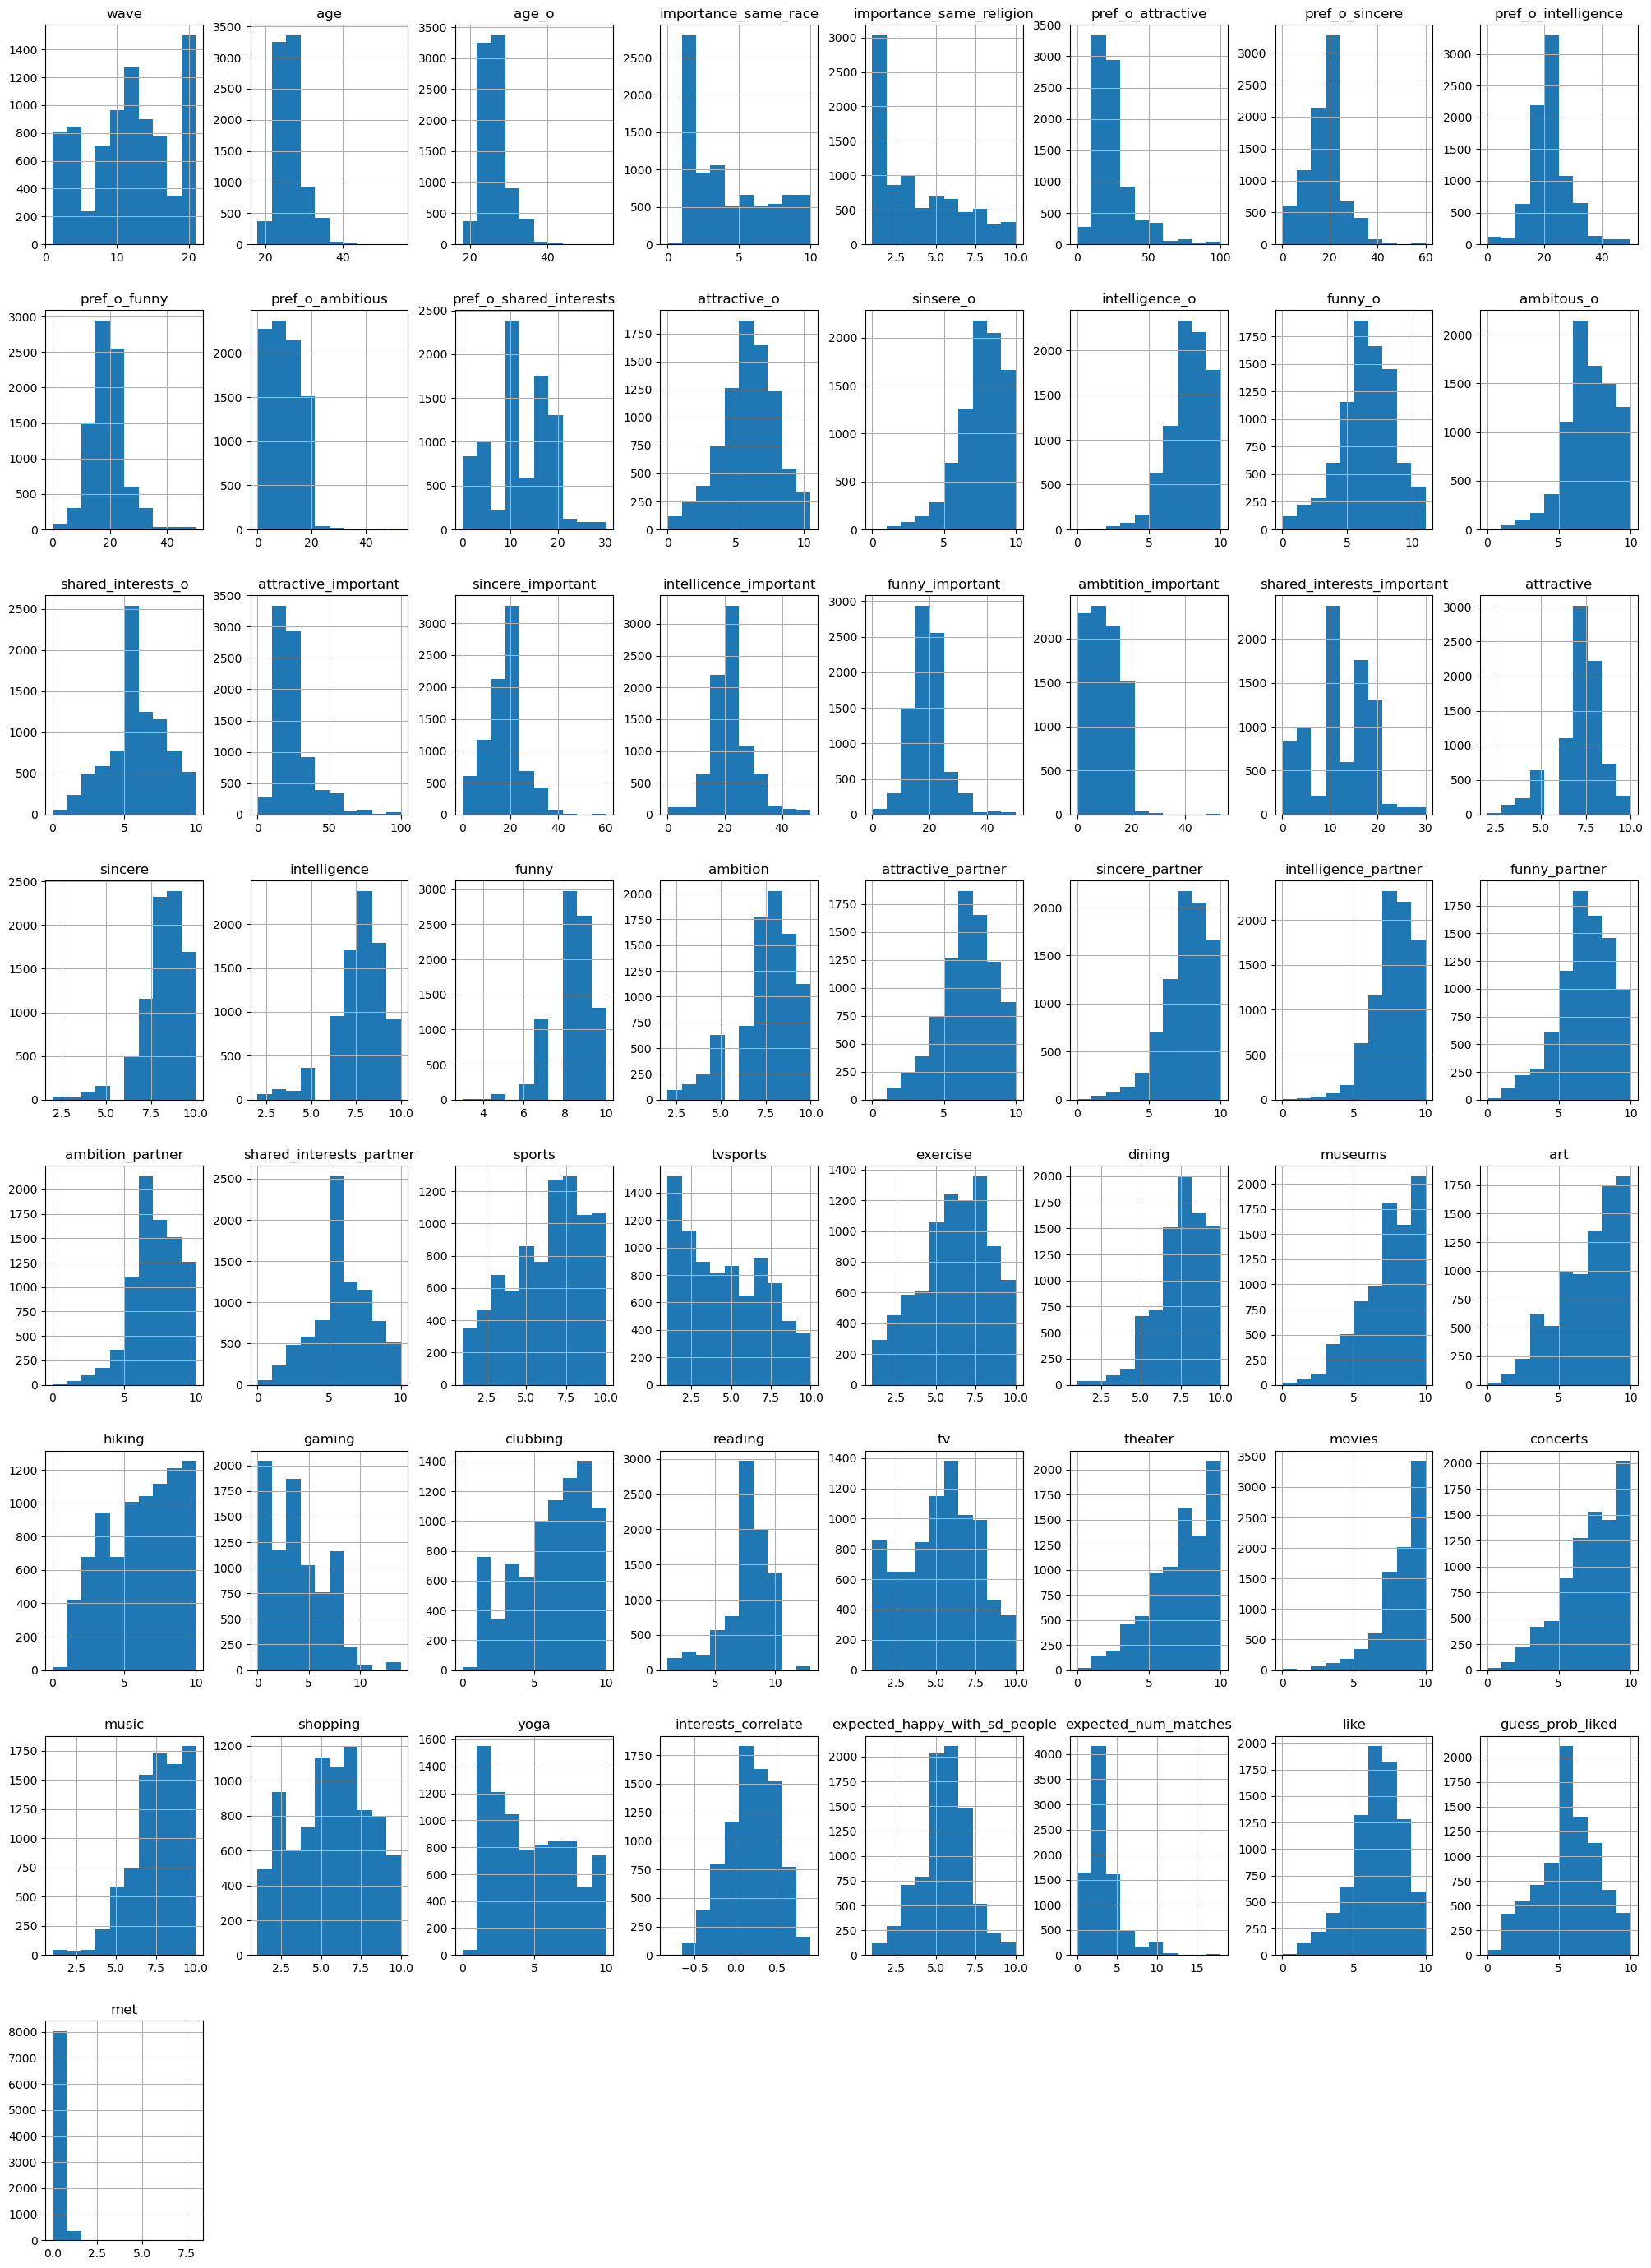

In [14]:
df.hist(figsize = [25,35])

# One-hot encoding

In [21]:
pd.get_dummies(df).head()

,wave,age,age_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_matches,like,guess_prob_liked,met,gender_female,gender_male,race_?,race_Asian/Pacific Islander/Asian-American,race_Black/African American,race_European/Caucasian-American,race_Latino/Hispanic American,race_Other,race_o_?,race_o_Asian/Pacific Islander/Asian-American,race_o_Black/African American,race_o_European/Caucasian-American,race_o_Latino/Hispanic American,race_o_Other,field_?,field_Acting,field_African-American Studies/History,field_American Studies,field_American Studies [Masters],field_Anthropology,field_Anthropology/Education,field_Applied Maths/Econs,field_Applied Physiology & Nutrition,field_Architecture,field_Art Education,field_Art History,field_Art History/medicine,field_Arts Administration,field_BUSINESS CONSULTING,field_Bilingual Education,field_Biochemistry,field_Biochemistry & Molecular Biophysics,field_Biology,field_Biology PhD,field_Biomedical Engineering,field_Biomedical Informatics,field_Biomedical engineering,field_Biotechnology,field_Business,field_Business & International Affairs,field_Business Administration,field_Business School,field_Business [Finance & Marketing],field_Business [MBA],field_Business and International Affairs [MBA/MIA Dual Degree],field_Business- MBA,field_Business/ Finance/ Real Estate,field_Business/Law,field_Business; Media,field_Business; marketing,field_Cell Biology,field_Chemistry,field_Classics,field_Climate Dynamics,field_Climate-Earth and Environ. Science,field_Clinical Psychology,field_Cognitive Studies in Education,field_Communications,field_Communications in Education,field_Comparative Literature,field_Computational Biochemsistry,field_Computer Science,field_Conservation biology,field_Consulting,field_Counseling Psychology,field_Creative Writing,field_Creative Writing - Nonfiction,field_Creative Writing [Nonfiction],field_Curriculum and Teaching/Giftedness,field_EDUCATION,field_ELECTRICAL ENGINEERING,field_Early Childhood Education,field_Earth and Environmental Science,field_Ecology,field_Economics,field_Economics and Political Science,field_Economics; English,field_Economics; Sociology,field_Ed.D. in higher education policy at TC,field_Education,field_Education Administration,field_Education Leadership - Public School Administration,field_Education Policy,field_Education- Literacy Specialist,field_Educational Psychology,field_Electrical Engg.,field_Electrical Engineering,field_Elementary Education,field_Elementary Education - Preservice,field_Elementary/Childhood Education [MA],field_Engineering,field_English,field_English Education,field_English and Comp Lit,field_Environmental Engineering,field_Epidemiology,field_Film,field_Finanace,field_Finance,field_Finance&Economics,field_Finance/Economics,field_Financial Engineering,field_Fundraising Management,field_GS Postbacc PreMed,field_GSAS,field_General management/finance,field_Genetics,field_Genetics & Development,field_German Literature,field_Health policy,field_Higher Ed. - M.A.,field_History,field_History [GSAS - PhD],field_History of Religion,field_Human Rights,field_Human Rights: Middle East,field_Industrial Engineering,field_Industrial Engineering/Operations Research,field_Instructional Media and Technology,field_Instructional Tech & Media,field_Intellectual Property Law,field_International Affairs,field_International

In [22]:
df.groupby('race').size()

race
?                                          63
Asian/Pacific Islander/Asian-American    1982
Black/African American                    420
European/Caucasian-American              4727
Latino/Hispanic American                  664
Other                                     522
dtype: int64

In [23]:
df.groupby('field').size()

field
?                                                            63
Acting                                                       22
African-American Studies/History                             15
American Studies                                              9
American Studies [Masters]                                   16
Anthropology                                                  9
Anthropology/Education                                       14
Applied Maths/Econs                                          16
Applied Physiology & Nutrition                               18
Architecture                                                 10
Art Education                                                37
Art History                                                  21
Art History/medicine                                         10
Arts Administration                                           9
BUSINESS CONSULTING                                          20
Bilingual Education               

In [24]:
df.describe()

,wave,age,age_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_matches,like,guess_prob_liked,met
count,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000
mean,11.350919,26.358928,26.364999,3.784793,3.651645,22.495347,17.396867,20.270759,17.459714,10.685375,11.845930,6.190411,7.175256,7.369301,6.400599,6.778409,5.474870,22.514632,17.396389,20.265613,17.457043,10.682539,11.845111,7.084733,8.294935,7.704460,8.403965,7.578388,6.189995,7.175164,7.368597,6.400598,6.777524,5.474559,6.425232,4.575491,6.245813,7.783829,6.985781,6.714544,5.737077,3.881191,5.745993,7.678515,5.304133,6.776118,7.919629,6.825401,7.851066,5.631281,4.339197,0.196010,5.534131,3.207814,6.134087,5.207523,0.049856
std,5.995903,3.546480,3.541458,2.832258,2.791978,12.502851,7.006484,6.746767,6.049825,6.087291,6.313565,1.925469,1.710499,1.521919,1.911629,1.715024,2.012929,12.528179,7.013394,6.750943,6.052827,6.088588,6.316038,1.387008,1.398611,1.554486,1.069839,1.767135,1.926513,1.711300,1.522814,1.912453,1.716119,2.014356,2.606645,2.788632,2.407425,1.746573,2.042532,2.252709,2.558059,2.608122,2.490391,1.997082,2.517181,2.224588,1.692888,2.146091,1.783358,2.596582,2.704767,0.300663,1.723574,2.267192,1.814717,2.089919,0.275780
min,1.000000,18.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-0.830000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,24.000000,24.000000,1.000000,1.000000,15.000000,15.000000,17.650000,15.000000,5.000000,10.000000,5.000000,6.000000,7.000000,5.000000,6.000000,4.000000,15.000000,15.000000,17.650000,15.000000,5.000000,10.000000,6.000000,8.000000,7.000000,8.000000,7.000000,5.000000,6.000000,7.000000,5.000000,6.000000,4.000000,5.000000,2.000000,5.000000,7.000000,6.000000,5.000000,4.000000,2.000000,4.000000,7.000000,3.000000,5.000000,7.000000,5.000000,7.000000,4.000000,2.000000,-0.010000,5.000000,2.000000,5.000000,4.000000,0.000000
50%,11.000000,26.000000,26.000000,3.000000,3.000000,20.000000,18.000000,20.000000,18.000000,10.000000,11.360000,6.000000,7.000000,7.369301,6.400599,7.000000,5.474870,20.000000,18.180000,20.000000,18.000000,10.000000,11.110000,7.000000,8.147468,8.000000,8.000000,8.000000,6.000000,7.000000,7.368597,6.400598,7.000000,5.474559,7.000000,4.000000,6.245813,8.000000,7.000000,7.000000,6.000000,3.000000,6.000000,8.000000,6.000000,7.000000,8.000000,7.000000,8.000000,

# Train Test split and Normalization

In [ ]:
X = df.drop(["match"], axis=1) 
y = df['match'] 

# Split the dataset in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalization of the data starting from information of just the training set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Apply the scaler to the test set
X_test = scaler.transform(X_test)